In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [3]:
df_train = pd.read_csv("C:/Users/Zehra/Desktop/Python-SQL/train.csv")
gender_sub = pd.read_csv("C:/Users/Zehra/Desktop/Python-SQL/gender_submission.csv")
df_test = pd.read_csv("C:/Users/Zehra/Desktop/Python-SQL/test.csv")

In [4]:
df = pd.concat([df_train, df_test], axis = 0)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<AxesSubplot:>

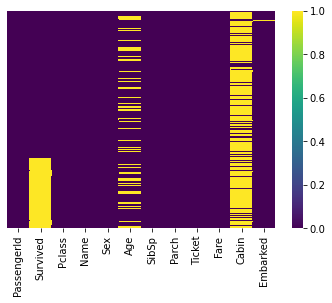

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

In [9]:
df["Age"].fillna(df.groupby("Sex")
                ["Age"].transform("mean"), inplace=True)

In [10]:
df.Cabin =df.Cabin.fillna(0)
df.Fare =df.Fare.fillna(0)
df.Embarked =df.Embarked.fillna(0)

CORRELATİON

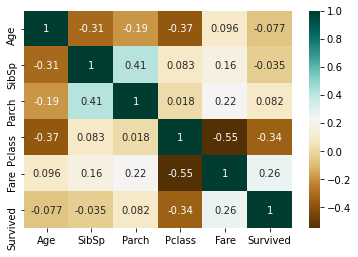

In [11]:
g = sns.heatmap(df_train[["Age", "SibSp", "Parch", "Pclass", "Fare", "Survived"]].corr()
                ,cmap= "BrBG", annot = True)

SURVİVED

<AxesSubplot:xlabel='Survived', ylabel='count'>

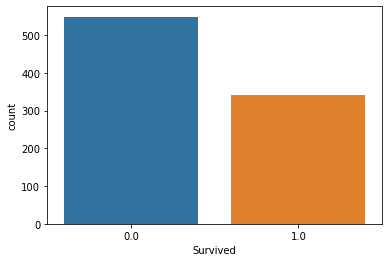

In [12]:
sns.countplot(x="Survived", data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

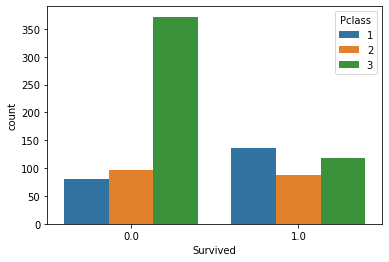

In [13]:
sns.countplot (x= "Survived", hue="Pclass", data=df)

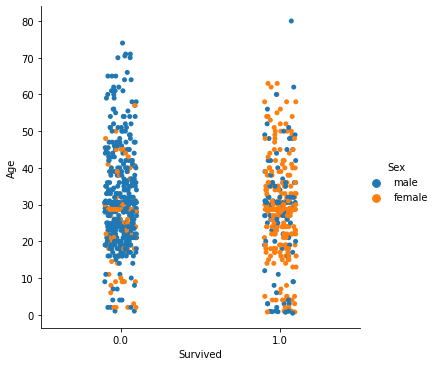

In [14]:
sns.catplot (x = "Survived", y="Age", data = df , hue = "Sex");

AGE

<AxesSubplot:ylabel='Frequency'>

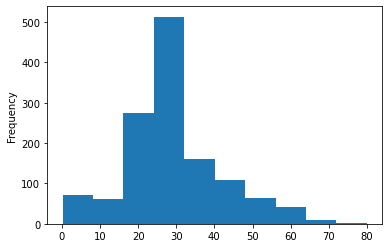

In [15]:
df["Age"].plot.hist()

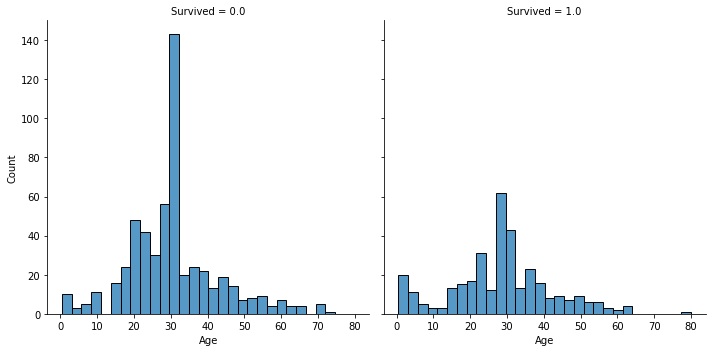

In [16]:
sns.displot(df, x = "Age", col = "Survived")

SİBSP

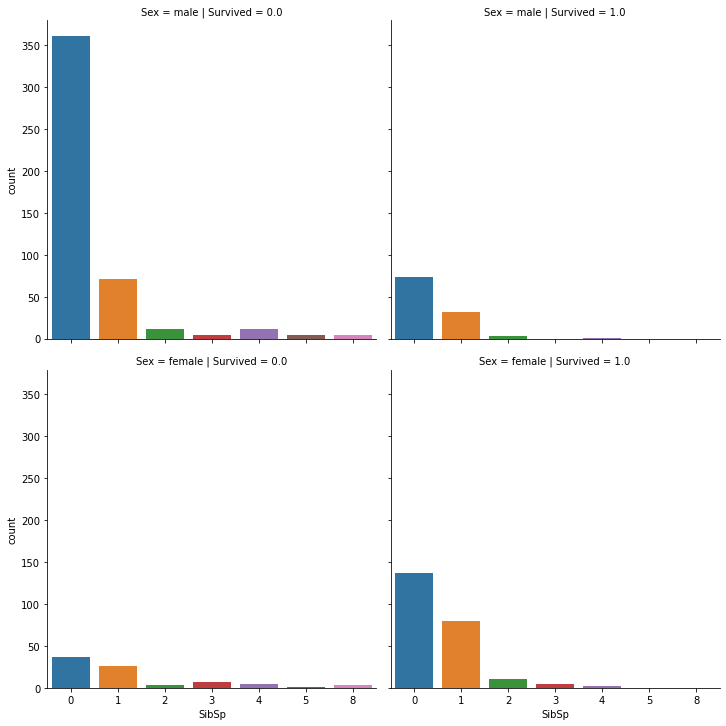

In [17]:
sns.catplot(x="SibSp", col="Survived", row="Sex", data = df, kind= "count")

PARCH

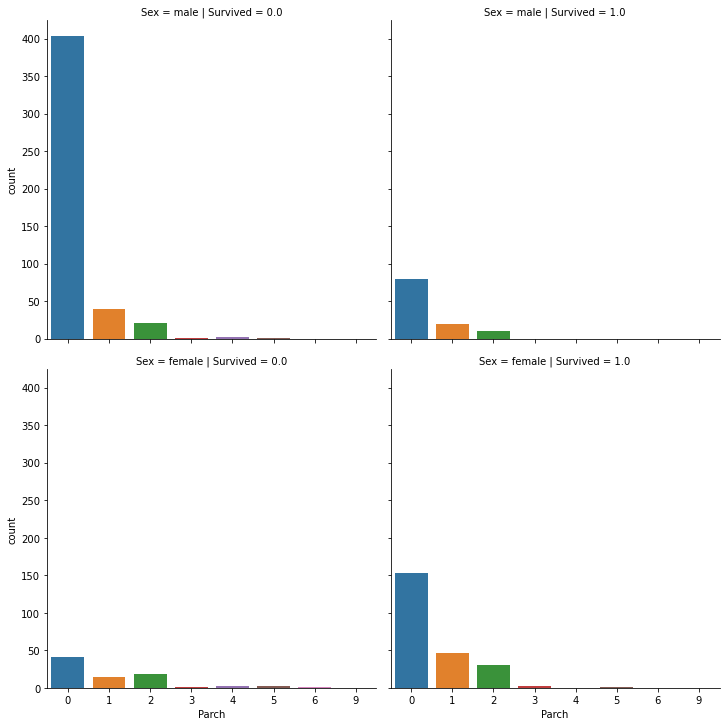

In [18]:
sns.catplot(x="Parch", col="Survived", row = "Sex", data=df, kind="count")

NAME

In [19]:
df["Title"] = [i.split(",")[1].split(".")[0].strip() for i in df["Name"]]

In [20]:
df.Title = df.Title.astype("category")

<AxesSubplot:xlabel='count', ylabel='Title'>

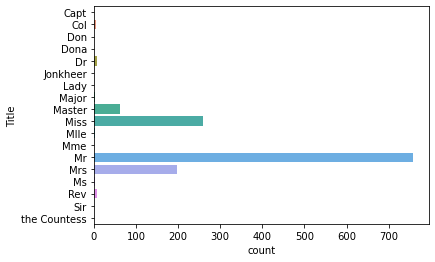

In [21]:
sns.countplot(y="Title", data = df)

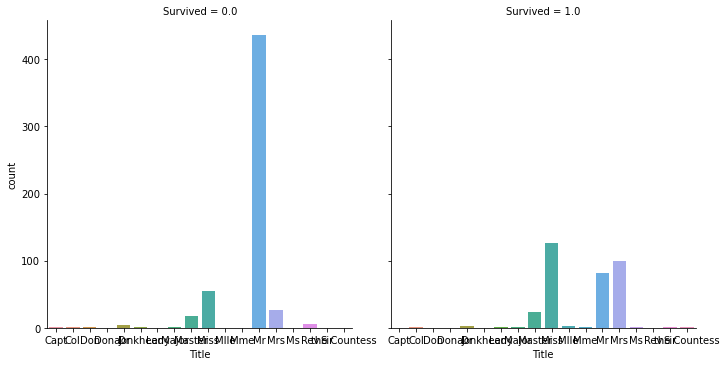

In [22]:
sns.catplot(x="Title", col = "Survived", data = df, kind = "count")

In [23]:
le = preprocessing.LabelEncoder()
df['Title'] = le.fit_transform(df['Title'])